<a href="https://colab.research.google.com/github/semesarker/A-Text-Independent-Speech-Emotion-Recognition-Based-on-Convolution-Neural-Network/blob/main/CNN2D%2BLSTM_Model_using_MFCC_%26_Melspectrogram_features_on_Ravdess_%26_TESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/rav.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/rav.zip
   creating: rav/
   creating: rav/Actor_01/
  inflating: rav/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-02-01.wav  
  infl

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/TESS.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/TESS.zip
   creating: TESS/
   creating: TESS/OAF_angry/
  inflating: TESS/OAF_angry/OAF_back_angry.wav  
  inflating: TESS/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS/OAF_angry/OAF_base_angry.wav  
  inflating: TESS/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS/OAF_angry/OAF_book_angry.wav  
  inflating: TESS/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS/OAF_angry/OAF_cab_angry.wav  
  inflating: TESS/OAF_angry/OAF_calm_angry.wav  
  inflating: TESS/OAF_angry/OAF_came_angry.wav  
  inflating: TESS/OAF_angry/OAF_cause_angry.wav  
  inflating: TESS/OAF_angry/OAF_chain_angry.wav  
  inflating: TES

In [ ]:
# Keras
#import tensorflow as tf
from IPython.display import Audio
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
Ravdess = "/content/rav"
ravdess_directory_list = os.listdir(Ravdess)
ravdess_directory_list

['Actor_19',
 'Actor_24',
 'Actor_11',
 'Actor_23',
 'Actor_22',
 'Actor_16',
 'Actor_03',
 'Actor_17',
 'Actor_06',
 'Actor_12',
 'Actor_20',
 'Actor_04',
 'Actor_15',
 'Actor_01',
 'Actor_10',
 'Actor_14',
 'Actor_21',
 'Actor_08',
 'Actor_02',
 'Actor_07',
 'Actor_05',
 'Actor_18',
 'Actor_13',
 'Actor_09']

In [ ]:
# Ravdess preprocess
ravdess_directory_list = os.listdir(Ravdess)
file_path = []
file_emotion = []
for directory in ravdess_directory_list:
    # 24 different actors in Ravdess directory needed to be extracted as files for each actor
    actor = os.listdir(Ravdess + '/' + directory)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + directory + '/' + file)

In [ ]:
file_path

['/content/rav/Actor_19/03-01-06-01-02-02-19.wav',
 '/content/rav/Actor_19/03-01-01-01-01-01-19.wav',
 '/content/rav/Actor_19/03-01-03-01-01-01-19.wav',
 '/content/rav/Actor_19/03-01-04-01-02-02-19.wav',
 '/content/rav/Actor_19/03-01-04-01-01-02-19.wav',
 '/content/rav/Actor_19/03-01-08-01-02-01-19.wav',
 '/content/rav/Actor_19/03-01-04-01-02-01-19.wav',
 '/content/rav/Actor_19/03-01-08-02-02-01-19.wav',
 '/content/rav/Actor_19/03-01-03-02-02-01-19.wav',
 '/content/rav/Actor_19/03-01-06-01-01-01-19.wav',
 '/content/rav/Actor_19/03-01-05-02-02-01-19.wav',
 '/content/rav/Actor_19/03-01-05-01-01-01-19.wav',
 '/content/rav/Actor_19/03-01-02-02-02-01-19.wav',
 '/content/rav/Actor_19/03-01-07-02-01-01-19.wav',
 '/content/rav/Actor_19/03-01-02-01-02-02-19.wav',
 '/content/rav/Actor_19/03-01-02-01-01-02-19.wav',
 '/content/rav/Actor_19/03-01-03-02-02-02-19.wav',
 '/content/rav/Actor_19/03-01-06-01-01-02-19.wav',
 '/content/rav/Actor_19/03-01-06-02-02-02-19.wav',
 '/content/rav/Actor_19/03-01-0

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,fear,/content/rav/Actor_19/03-01-06-01-02-02-19.wav
1,neutral,/content/rav/Actor_19/03-01-01-01-01-01-19.wav
2,happy,/content/rav/Actor_19/03-01-03-01-01-01-19.wav
3,sad,/content/rav/Actor_19/03-01-04-01-02-02-19.wav
4,sad,/content/rav/Actor_19/03-01-04-01-01-02-19.wav


In [ ]:
Ravdess_df.shape

(1440, 2)

In [ ]:

Tess='/content/TESS'
tess_directory_list = os.listdir(Tess)
tess_directory_list

['OAF_neutral',
 'YAF_disgust',
 'OAF_Sad',
 'YAF_happy',
 'OAF_happy',
 'OAF_disgust',
 'YAF_sad',
 'YAF_angry',
 'OAF_angry',
 'OAF_Fear',
 'YAF_neutral',
 'OAF_Pleasant_surprise',
 'YAF_pleasant_surprised',
 'YAF_fear']

In [ ]:
# TESS preprocess
# increase the data available for surprise emotion
tess_directory_list = os.listdir(Tess)
file_path = []
file_emotion = []
for dir in tess_directory_list:
    directories = os.listdir(Tess +'/'+  dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + '/' + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,neutral,/content/TESS/OAF_neutral/OAF_vote_neutral.wav
1,neutral,/content/TESS/OAF_neutral/OAF_met_neutral.wav
2,neutral,/content/TESS/OAF_neutral/OAF_date_neutral.wav
3,neutral,/content/TESS/OAF_neutral/OAF_said_neutral.wav
4,neutral,/content/TESS/OAF_neutral/OAF_half_neutral.wav


In [ ]:
Tess_df.shape

(2800, 2)

In [ ]:
data_path = pd.concat([Ravdess_df, Tess_df], axis = 0)
data_path

,Emotions,Path
0,fear,/content/rav/Actor_19/03-01-06-01-02-02-19.wav
1,neutral,/content/rav/Actor_19/03-01-01-01-01-01-19.wav
2,happy,/content/rav/Actor_19/03-01-03-01-01-01-19.wav
3,sad,/content/rav/Actor_19/03-01-04-01-02-02-19.wav
4,sad,/content/rav/Actor_19/03-01-04-01-01-02-19.wav
...,...,...
2795,fear,/content/TESS/YAF_fear/YAF_cause_fear.wav
2796,fear,/content/TESS/YAF_fear/YAF_sure_fear.wav
2797,fear,/content/TESS/YAF_fear/YAF_hash_fear.wav
2798,fear,/content/TESS/YAF_fear/YAF_mouse_fear.wav


In [ ]:
index = list(np.arange(start=0, stop=4240, step=1))
data_path.index = index

In [ ]:
data_path.reset_index()

,index,Emotions,Path
0,0,fear,/content/rav/Actor_19/03-01-06-01-02-02-19.wav
1,1,neutral,/content/rav/Actor_19/03-01-01-01-01-01-19.wav
2,2,happy,/content/rav/Actor_19/03-01-03-01-01-01-19.wav
3,3,sad,/content/rav/Actor_19/03-01-04-01-02-02-19.wav
4,4,sad,/content/rav/Actor_19/03-01-04-01-01-02-19.wav
...,...,...,...
4235,4235,fear,/content/TESS/YAF_fear/YAF_cause_fear.wav
4236,4236,fear,/content/TESS/YAF_fear/YAF_sure_fear.wav
4237,4237,fear,/content/TESS/YAF_fear/YAF_hash_fear.wav
4238,4238,fear,/content/TESS/YAF_fear/YAF_mouse_fear.wav


In [ ]:
data_path.drop(['index'],axis=1)

KeyError: ignored

In [ ]:
data_path

,Emotions,Path
0,fear,/content/rav/Actor_19/03-01-06-01-02-02-19.wav
1,neutral,/content/rav/Actor_19/03-01-01-01-01-01-19.wav
2,happy,/content/rav/Actor_19/03-01-03-01-01-01-19.wav
3,sad,/content/rav/Actor_19/03-01-04-01-02-02-19.wav
4,sad,/content/rav/Actor_19/03-01-04-01-01-02-19.wav
...,...,...
4235,fear,/content/TESS/YAF_fear/YAF_cause_fear.wav
4236,fear,/content/TESS/YAF_fear/YAF_sure_fear.wav
4237,fear,/content/TESS/YAF_fear/YAF_hash_fear.wav
4238,fear,/content/TESS/YAF_fear/YAF_mouse_fear.wav


In [ ]:
data_path.Emotions.value_counts()

fear        592
happy       592
sad         592
surprise    592
angry       592
disgust     592
neutral     496
calm        192
Name: Emotions, dtype: int64

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
sampling_rate=16000
audio_duration=2.5
n_mfcc = 30
n_melspec = 30
n_fft=512
def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,158,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,40000)




          # which feature?
          # if mfcc == 1:
          #       # MFCC extraction
          #   MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
          #   MFCC = np.expand_dims(MFCC, axis=-1)
          #   X[cnt,] = MFCC
          #   print('mfcc',MFCC.shape)

        if mfcc == 1 and mel== 0:
                  # MFCC extraction
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              MFCC = np.expand_dims(MFCC, axis=-1)
              X[cnt,] = MFCC
              print('mfcc',MFCC.shape)

        elif mfcc==0 and mel==1 :
                  # Log-melspectogram

              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              logspec = librosa.amplitude_to_db(melspec)
              logspec = np.expand_dims(logspec, axis=-1)
              X[cnt,] = logspec

              print('mel',logspec.shape)

        elif mfcc==1 and mel== 1:
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              mel_spectrogram = np.abs(melspec)
              logspec = librosa.amplitude_to_db(mel_spectrogram)
              mfcc_logspec= np.concatenate((MFCC,logspec),axis=1)
              #mel_logspec= np.vstack([MFCC,logspec])
              #print(mfcc_logspec.shape)
              mfcc_logspec = np.expand_dims(mfcc_logspec, axis=-1)
              X[cnt,] = mfcc_logspec
              print('mfcc_logspec',mfcc_logspec.shape)

        cnt += 1

    return X

In [ ]:
mel_mfcc=prepare_data(data_path,n=30,mfcc=1,mel=1)

  0%|          | 2/4240 [00:00<05:03, 13.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 6/4240 [00:00<05:27, 12.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 8/4240 [00:00<07:11,  9.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 10/4240 [00:01<08:13,  8.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 12/4240 [00:01<09:56,  7.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 14/4240 [00:01<11:34,  6.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 17/4240 [00:02<07:36,  9.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  0%|          | 21/4240 [00:02<05:43, 12.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 25/4240 [00:02<04:50, 14.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 29/4240 [00:02<04:24, 15.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 33/4240 [00:02<04:22, 16.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 37/4240 [00:03<04:18, 16.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 39/4240 [00:03<05:18, 13.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 43/4240 [00:03<05:26, 12.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 45/4240 [00:03<06:20, 11.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 47/4240 [00:04<06:51, 10.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|          | 49/4240 [00:04<07:13,  9.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 53/4240 [00:04<06:16, 11.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 55/4240 [00:04<06:28, 10.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 57/4240 [00:05<07:08,  9.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 59/4240 [00:05<07:18,  9.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 61/4240 [00:05<07:37,  9.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  1%|▏         | 63/4240 [00:05<07:42,  9.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 67/4240 [00:06<05:47, 12.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 69/4240 [00:06<05:23, 12.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 71/4240 [00:06<05:50, 11.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 75/4240 [00:06<06:22, 10.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 77/4240 [00:07<06:53, 10.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 79/4240 [00:07<06:54, 10.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 83/4240 [00:07<06:27, 10.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 87/4240 [00:07<05:15, 13.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 91/4240 [00:08<04:37, 14.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 95/4240 [00:08<04:17, 16.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 99/4240 [00:08<04:14, 16.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  2%|▏         | 103/4240 [00:08<04:20, 15.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 107/4240 [00:09<04:22, 15.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 109/4240 [00:09<04:30, 15.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 113/4240 [00:09<04:32, 15.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 117/4240 [00:09<04:17, 16.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 121/4240 [00:10<04:05, 16.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 125/4240 [00:10<04:00, 17.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 129/4240 [00:10<04:00, 17.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 133/4240 [00:10<04:03, 16.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 137/4240 [00:10<03:54, 17.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 141/4240 [00:11<03:55, 17.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  3%|▎         | 145/4240 [00:11<03:54, 17.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▎         | 149/4240 [00:11<03:53, 17.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▎         | 153/4240 [00:11<04:09, 16.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▎         | 157/4240 [00:12<04:12, 16.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 161/4240 [00:12<04:04, 16.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 165/4240 [00:12<03:57, 17.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 169/4240 [00:12<03:59, 17.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 173/4240 [00:13<03:53, 17.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 177/4240 [00:13<03:56, 17.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 181/4240 [00:13<03:52, 17.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 185/4240 [00:13<03:57, 17.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  4%|▍         | 189/4240 [00:14<03:54, 17.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 193/4240 [00:14<03:51, 17.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 197/4240 [00:14<03:56, 17.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 201/4240 [00:14<03:57, 16.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 205/4240 [00:14<03:58, 16.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▍         | 209/4240 [00:15<03:55, 17.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 213/4240 [00:15<03:48, 17.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 217/4240 [00:15<03:41, 18.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 221/4240 [00:15<03:48, 17.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 225/4240 [00:16<03:46, 17.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 229/4240 [00:16<03:43, 17.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  5%|▌         | 233/4240 [00:16<03:50, 17.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 237/4240 [00:16<03:46, 17.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 241/4240 [00:16<03:46, 17.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 245/4240 [00:17<03:47, 17.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 249/4240 [00:17<03:45, 17.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 253/4240 [00:17<03:48, 17.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 257/4240 [00:17<04:24, 15.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 261/4240 [00:18<04:23, 15.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▌         | 263/4240 [00:18<05:09, 12.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 265/4240 [00:18<05:42, 11.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 267/4240 [00:18<06:08, 10.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 269/4240 [00:19<06:25, 10.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 271/4240 [00:19<06:32, 10.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 273/4240 [00:19<06:46,  9.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  6%|▋         | 275/4240 [00:19<06:51,  9.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 277/4240 [00:19<07:04,  9.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 279/4240 [00:20<07:14,  9.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 281/4240 [00:20<07:24,  8.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 283/4240 [00:20<07:51,  8.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 285/4240 [00:20<07:36,  8.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 287/4240 [00:21<07:40,  8.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 289/4240 [00:21<07:33,  8.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 291/4240 [00:21<07:35,  8.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 294/4240 [00:21<06:05, 10.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 298/4240 [00:22<04:39, 14.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 302/4240 [00:22<04:14, 15.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 306/4240 [00:22<04:03, 16.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 310/4240 [00:22<03:50, 17.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  7%|▋         | 314/4240 [00:22<03:41, 17.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 318/4240 [00:23<03:43, 17.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 322/4240 [00:23<03:44, 17.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 326/4240 [00:23<03:49, 17.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 330/4240 [00:23<04:27, 14.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 332/4240 [00:24<05:09, 12.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 334/4240 [00:24<06:41,  9.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 336/4240 [00:24<07:24,  8.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 338/4240 [00:25<07:22,  8.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 340/4240 [00:25<07:33,  8.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 342/4240 [00:25<08:23,  7.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 345/4240 [00:25<07:23,  8.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 349/4240 [00:26<05:11, 12.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 353/4240 [00:26<04:26, 14.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  8%|▊         | 357/4240 [00:26<04:02, 16.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▊         | 361/4240 [00:26<03:51, 16.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▊         | 365/4240 [00:27<03:50, 16.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▊         | 369/4240 [00:27<03:49, 16.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 373/4240 [00:27<03:45, 17.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 377/4240 [00:27<03:37, 17.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 381/4240 [00:27<03:35, 17.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 385/4240 [00:28<03:41, 17.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 389/4240 [00:28<03:38, 17.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 393/4240 [00:28<03:41, 17.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 397/4240 [00:28<03:50, 16.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


  9%|▉         | 401/4240 [00:29<03:41, 17.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 403/4240 [00:29<04:52, 13.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 405/4240 [00:29<06:03, 10.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 407/4240 [00:29<06:41,  9.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 409/4240 [00:30<07:08,  8.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 412/4240 [00:30<07:04,  9.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 415/4240 [00:30<06:17, 10.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 417/4240 [00:30<06:05, 10.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 419/4240 [00:31<06:06, 10.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 421/4240 [00:31<06:08, 10.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|▉         | 423/4240 [00:31<06:26,  9.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 426/4240 [00:31<07:23,  8.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 427/4240 [00:32<07:26,  8.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 430/4240 [00:32<08:39,  7.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 431/4240 [00:32<10:21,  6.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec

 10%|█         | 433/4240 [00:33<10:50,  5.85it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 435/4240 [00:33<10:59,  5.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 436/4240 [00:33<11:05,  5.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 439/4240 [00:34<11:13,  5.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 441/4240 [00:34<10:20,  6.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 443/4240 [00:34<10:33,  5.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 10%|█         | 444/4240 [00:35<11:10,  5.67it/s]

mfcc_logspec (30, 158, 1)


 11%|█         | 446/4240 [00:35<11:44,  5.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 448/4240 [00:35<11:40,  5.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 449/4240 [00:35<10:40,  5.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 452/4240 [00:36<08:29,  7.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 455/4240 [00:36<08:16,  7.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 457/4240 [00:36<07:52,  8.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 459/4240 [00:37<06:44,  9.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 461/4240 [00:37<07:50,  8.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 465/4240 [00:37<05:36, 11.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 467/4240 [00:37<06:00, 10.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 469/4240 [00:37<05:24, 11.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 471/4240 [00:38<06:00, 10.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 474/4240 [00:38<06:47,  9.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█         | 476/4240 [00:38<07:12,  8.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█▏        | 478/4240 [00:39<07:27,  8.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█▏        | 480/4240 [00:39<06:56,  9.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█▏        | 483/4240 [00:39<05:56, 10.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 11%|█▏        | 487/4240 [00:39<04:48, 12.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 491/4240 [00:40<04:08, 15.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 495/4240 [00:40<03:47, 16.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 499/4240 [00:40<03:38, 17.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 503/4240 [00:40<03:40, 16.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 507/4240 [00:40<03:39, 17.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 511/4240 [00:41<03:32, 17.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 515/4240 [00:41<03:28, 17.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 519/4240 [00:41<03:32, 17.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 523/4240 [00:41<03:27, 17.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 12%|█▏        | 527/4240 [00:42<03:25, 18.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 531/4240 [00:42<03:26, 17.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 535/4240 [00:42<03:34, 17.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 539/4240 [00:42<03:44, 16.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 543/4240 [00:43<03:42, 16.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 547/4240 [00:43<03:33, 17.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 551/4240 [00:43<03:29, 17.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 555/4240 [00:43<03:32, 17.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 559/4240 [00:43<03:31, 17.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 563/4240 [00:44<03:31, 17.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 567/4240 [00:44<03:32, 17.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 13%|█▎        | 571/4240 [00:44<03:30, 17.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▎        | 575/4240 [00:44<03:31, 17.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▎        | 579/4240 [00:45<03:32, 17.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 583/4240 [00:45<03:30, 17.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 587/4240 [00:45<03:32, 17.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 591/4240 [00:45<03:34, 16.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 593/4240 [00:45<03:43, 16.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 597/4240 [00:46<03:53, 15.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 601/4240 [00:46<04:22, 13.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 603/4240 [00:46<05:12, 11.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 605/4240 [00:46<05:38, 10.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 607/4240 [00:47<05:53, 10.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 609/4240 [00:47<06:03,  9.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 611/4240 [00:47<06:22,  9.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 14%|█▍        | 613/4240 [00:47<06:35,  9.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 615/4240 [00:48<06:35,  9.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 617/4240 [00:48<06:31,  9.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 619/4240 [00:48<06:26,  9.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 621/4240 [00:48<06:34,  9.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 623/4240 [00:48<06:38,  9.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 625/4240 [00:49<06:50,  8.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 628/4240 [00:49<06:41,  9.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 629/4240 [00:49<06:45,  8.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▍        | 633/4240 [00:50<06:16,  9.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 636/4240 [00:50<05:33, 10.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 640/4240 [00:50<04:46, 12.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 644/4240 [00:50<04:14, 14.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 648/4240 [00:51<03:52, 15.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 652/4240 [00:51<03:36, 16.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 15%|█▌        | 656/4240 [00:51<03:32, 16.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 660/4240 [00:51<03:23, 17.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 664/4240 [00:51<03:26, 17.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 668/4240 [00:52<03:25, 17.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 672/4240 [00:52<03:18, 17.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 676/4240 [00:52<03:20, 17.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 680/4240 [00:52<03:57, 14.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 682/4240 [00:53<04:05, 14.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 684/4240 [00:53<04:50, 12.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▌        | 688/4240 [00:53<05:28, 10.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▋        | 690/4240 [00:53<05:49, 10.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▋        | 692/4240 [00:54<06:17,  9.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▋        | 694/4240 [00:54<06:03,  9.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▋        | 696/4240 [00:54<05:55,  9.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 16%|█▋        | 699/4240 [00:54<06:15,  9.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 701/4240 [00:55<06:33,  8.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 704/4240 [00:55<05:21, 11.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 706/4240 [00:55<06:02,  9.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 710/4240 [00:55<05:21, 10.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 712/4240 [00:56<05:51, 10.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 714/4240 [00:56<05:44, 10.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 716/4240 [00:56<05:50, 10.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 720/4240 [00:56<05:09, 11.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 724/4240 [00:57<04:16, 13.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 728/4240 [00:57<03:48, 15.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 732/4240 [00:57<03:33, 16.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 736/4240 [00:57<03:27, 16.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 17%|█▋        | 740/4240 [00:58<03:26, 16.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 744/4240 [00:58<03:23, 17.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 748/4240 [00:58<03:29, 16.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 752/4240 [00:58<03:27, 16.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 756/4240 [00:59<03:27, 16.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 760/4240 [00:59<03:21, 17.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 764/4240 [00:59<03:18, 17.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 768/4240 [00:59<03:18, 17.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 772/4240 [00:59<03:14, 17.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 776/4240 [01:00<03:17, 17.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 778/4240 [01:00<04:01, 14.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 780/4240 [01:00<04:17, 13.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 782/4240 [01:00<04:55, 11.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 18%|█▊        | 784/4240 [01:00<05:17, 10.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▊        | 786/4240 [01:01<05:41, 10.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▊        | 788/4240 [01:01<05:54,  9.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▊        | 791/4240 [01:01<06:00,  9.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▊        | 793/4240 [01:01<06:05,  9.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 795/4240 [01:02<06:15,  9.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 797/4240 [01:02<06:11,  9.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 799/4240 [01:02<06:11,  9.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 801/4240 [01:02<06:18,  9.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 803/4240 [01:03<06:20,  9.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 805/4240 [01:03<06:11,  9.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 807/4240 [01:03<06:14,  9.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 809/4240 [01:03<06:13,  9.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 811/4240 [01:03<06:15,  9.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 813/4240 [01:04<06:30,  8.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 817/4240 [01:04<04:36, 12.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 821/4240 [01:04<03:54, 14.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 19%|█▉        | 825/4240 [01:04<03:33, 16.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 829/4240 [01:05<03:32, 16.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 833/4240 [01:05<03:33, 15.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 837/4240 [01:05<03:24, 16.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 841/4240 [01:05<03:23, 16.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|█▉        | 845/4240 [01:06<03:15, 17.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 849/4240 [01:06<03:21, 16.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 853/4240 [01:06<03:18, 17.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 857/4240 [01:06<03:14, 17.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 861/4240 [01:07<03:09, 17.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 865/4240 [01:07<03:07, 18.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 20%|██        | 869/4240 [01:07<03:13, 17.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 873/4240 [01:07<03:06, 18.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 877/4240 [01:07<03:06, 18.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 881/4240 [01:08<03:09, 17.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 885/4240 [01:08<03:22, 16.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 889/4240 [01:08<03:15, 17.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 893/4240 [01:08<03:11, 17.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██        | 897/4240 [01:09<03:11, 17.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██▏       | 901/4240 [01:09<03:13, 17.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██▏       | 905/4240 [01:09<03:18, 16.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 21%|██▏       | 909/4240 [01:09<03:14, 17.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 913/4240 [01:10<03:10, 17.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 917/4240 [01:10<03:14, 17.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 921/4240 [01:10<03:09, 17.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 925/4240 [01:10<03:08, 17.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 929/4240 [01:10<03:09, 17.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 933/4240 [01:11<03:12, 17.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 937/4240 [01:11<03:16, 16.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 941/4240 [01:11<03:07, 17.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 945/4240 [01:11<03:06, 17.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 949/4240 [01:12<03:08, 17.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 22%|██▏       | 953/4240 [01:12<03:14, 16.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 955/4240 [01:12<03:23, 16.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 959/4240 [01:12<03:29, 15.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 963/4240 [01:13<03:28, 15.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 967/4240 [01:13<03:30, 15.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 971/4240 [01:13<03:26, 15.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 975/4240 [01:13<03:26, 15.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 979/4240 [01:14<03:21, 16.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 981/4240 [01:14<03:28, 15.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 983/4240 [01:14<03:38, 14.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 987/4240 [01:14<04:36, 11.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 989/4240 [01:14<05:14, 10.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 991/4240 [01:15<05:20, 10.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 23%|██▎       | 993/4240 [01:15<05:04, 10.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 997/4240 [01:15<05:11, 10.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 999/4240 [01:15<05:29,  9.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 1001/4240 [01:16<05:42,  9.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 1003/4240 [01:16<05:12, 10.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▎       | 1005/4240 [01:16<04:54, 11.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1007/4240 [01:16<05:18, 10.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1009/4240 [01:16<05:23, 10.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1011/4240 [01:17<05:29,  9.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1014/4240 [01:17<05:32,  9.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1016/4240 [01:17<05:38,  9.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1018/4240 [01:17<05:37,  9.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1021/4240 [01:18<05:39,  9.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1024/4240 [01:18<05:24,  9.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1027/4240 [01:18<04:42, 11.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1031/4240 [01:19<03:52, 13.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 24%|██▍       | 1035/4240 [01:19<03:25, 15.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1039/4240 [01:19<03:12, 16.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1043/4240 [01:19<03:13, 16.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1047/4240 [01:19<03:08, 16.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1051/4240 [01:20<03:04, 17.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1055/4240 [01:20<03:03, 17.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▍       | 1059/4240 [01:20<03:17, 16.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1063/4240 [01:20<03:20, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1067/4240 [01:21<03:13, 16.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1071/4240 [01:21<03:06, 16.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1075/4240 [01:21<03:07, 16.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 25%|██▌       | 1079/4240 [01:21<03:08, 16.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1083/4240 [01:22<03:07, 16.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1087/4240 [01:22<03:17, 15.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1091/4240 [01:22<03:19, 15.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1095/4240 [01:22<03:18, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1099/4240 [01:23<03:19, 15.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1103/4240 [01:23<03:20, 15.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1107/4240 [01:23<03:06, 16.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▌       | 1111/4240 [01:23<03:03, 17.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▋       | 1115/4240 [01:24<03:01, 17.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▋       | 1119/4240 [01:24<03:01, 17.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 26%|██▋       | 1123/4240 [01:24<02:58, 17.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1127/4240 [01:24<02:55, 17.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1131/4240 [01:25<03:00, 17.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1135/4240 [01:25<03:05, 16.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1139/4240 [01:25<03:07, 16.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1143/4240 [01:25<03:00, 17.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1147/4240 [01:25<03:05, 16.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1151/4240 [01:26<03:04, 16.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1155/4240 [01:26<03:04, 16.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1159/4240 [01:26<02:58, 17.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 27%|██▋       | 1163/4240 [01:26<03:07, 16.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1167/4240 [01:27<03:03, 16.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1171/4240 [01:27<02:59, 17.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1175/4240 [01:27<03:02, 16.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1179/4240 [01:27<02:54, 17.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1183/4240 [01:28<02:55, 17.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1187/4240 [01:28<02:51, 17.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1191/4240 [01:28<02:49, 17.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1193/4240 [01:28<02:49, 17.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1197/4240 [01:29<03:43, 13.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1199/4240 [01:29<03:50, 13.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1203/4240 [01:29<04:02, 12.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1205/4240 [01:29<04:46, 10.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 28%|██▊       | 1207/4240 [01:29<05:03,  9.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1209/4240 [01:30<05:05,  9.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1212/4240 [01:30<05:19,  9.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1214/4240 [01:30<05:19,  9.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1216/4240 [01:30<05:24,  9.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▊       | 1218/4240 [01:31<05:35,  9.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1220/4240 [01:31<05:36,  8.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1222/4240 [01:31<05:43,  8.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1224/4240 [01:31<05:53,  8.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1226/4240 [01:32<05:51,  8.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1228/4240 [01:32<05:55,  8.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1230/4240 [01:32<05:55,  8.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1232/4240 [01:32<05:50,  8.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1234/4240 [01:33<05:40,  8.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1238/4240 [01:33<03:52, 12.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1242/4240 [01:33<03:14, 15.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1246/4240 [01:33<02:59, 16.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 29%|██▉       | 1250/4240 [01:33<02:52, 17.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1254/4240 [01:34<03:16, 15.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1258/4240 [01:34<03:01, 16.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1262/4240 [01:34<02:53, 17.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1266/4240 [01:34<02:52, 17.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|██▉       | 1270/4240 [01:35<02:56, 16.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1274/4240 [01:35<02:52, 17.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1278/4240 [01:35<02:52, 17.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1282/4240 [01:35<02:53, 17.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1286/4240 [01:36<02:51, 17.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 30%|███       | 1290/4240 [01:36<02:53, 17.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1294/4240 [01:36<02:57, 16.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1298/4240 [01:36<02:52, 17.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1302/4240 [01:37<02:48, 17.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1306/4240 [01:37<02:49, 17.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1310/4240 [01:37<02:52, 17.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1314/4240 [01:37<02:47, 17.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1318/4240 [01:37<02:43, 17.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███       | 1322/4240 [01:38<02:54, 16.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███▏      | 1326/4240 [01:38<02:59, 16.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███▏      | 1330/4240 [01:38<03:07, 15.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 31%|███▏      | 1334/4240 [01:38<02:51, 16.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1338/4240 [01:39<02:49, 17.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1342/4240 [01:39<02:47, 17.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1346/4240 [01:39<02:51, 16.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1350/4240 [01:39<02:48, 17.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1354/4240 [01:40<02:56, 16.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1356/4240 [01:40<03:06, 15.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1360/4240 [01:40<03:04, 15.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1364/4240 [01:40<02:54, 16.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1368/4240 [01:41<02:55, 16.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1372/4240 [01:41<02:49, 16.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 32%|███▏      | 1376/4240 [01:41<02:49, 16.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1380/4240 [01:41<02:43, 17.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1384/4240 [01:41<02:45, 17.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1386/4240 [01:42<03:36, 13.20it/s]

mfcc_logspec (30, 158, 1)


 33%|███▎      | 1388/4240 [01:42<05:45,  8.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1392/4240 [01:42<04:23, 10.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1394/4240 [01:43<03:53, 12.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1396/4240 [01:43<04:10, 11.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1398/4240 [01:44<08:22,  5.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1401/4240 [01:44<07:34,  6.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1402/4240 [01:44<07:14,  6.53it/s]

mfcc_logspec (30, 158, 1)


 33%|███▎      | 1403/4240 [01:44<08:10,  5.78it/s]

mfcc_logspec (30, 158, 1)


 33%|███▎      | 1404/4240 [01:45<10:14,  4.61it/s]

mfcc_logspec (30, 158, 1)


 33%|███▎      | 1405/4240 [01:45<11:19,  4.17it/s]

mfcc_logspec (30, 158, 1)


 33%|███▎      | 1407/4240 [01:45<09:36,  4.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1409/4240 [01:46<07:32,  6.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1411/4240 [01:46<06:35,  7.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1413/4240 [01:46<06:07,  7.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1415/4240 [01:46<05:48,  8.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1417/4240 [01:47<05:44,  8.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 33%|███▎      | 1418/4240 [01:47<05:32,  8.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▎      | 1422/4240 [01:47<04:36, 10.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▎      | 1426/4240 [01:47<03:41, 12.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▎      | 1430/4240 [01:47<03:11, 14.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1434/4240 [01:48<02:58, 15.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1438/4240 [01:48<02:49, 16.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1444/4240 [01:48<02:20, 19.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1451/4240 [01:48<01:50, 25.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 34%|███▍      | 1458/4240 [01:49<01:38, 28.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▍      | 1466/4240 [01:49<01:32, 30.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▍      | 1470/4240 [01:49<01:35, 28.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▍      | 1477/4240 [01:49<01:32, 29.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1485/4240 [01:50<01:31, 30.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 35%|███▌      | 1489/4240 [01:50<01:30, 30.52it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1497/4240 [01:50<01:30, 30.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 35%|███▌      | 1504/4240 [01:50<01:35, 28.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1508/4240 [01:50<01:31, 29.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1516/4240 [01:51<01:30, 30.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1524/4240 [01:51<01:24, 31.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 36%|███▌      | 1528/4240 [01:51<01:23, 32.51it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▌      | 1536/4240 [01:51<01:28, 30.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 36%|███▋      | 1544/4240 [01:52<01:30, 29.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1548/4240 [01:52<01:30, 29.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1556/4240 [01:52<01:28, 30.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1564/4240 [01:52<01:29, 29.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1568/4240 [01:52<01:28, 30.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1576/4240 [01:53<01:23, 31.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 37%|███▋      | 1584/4240 [01:53<01:23, 31.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1592/4240 [01:53<01:24, 31.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1596/4240 [01:53<01:27, 30.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1604/4240 [01:53<01:23, 31.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1612/4240 [01:54<01:23, 31.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1620/4240 [01:54<01:25, 30.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1624/4240 [01:54<01:26, 30.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 38%|███▊      | 1632/4240 [01:54<01:24, 30.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▊      | 1640/4240 [01:55<01:23, 31.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1647/4240 [01:55<01:30, 28.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1653/4240 [01:55<01:34, 27.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1659/4240 [01:55<01:34, 27.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1662/4240 [01:55<01:37, 26.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1668/4240 [01:56<01:43, 24.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 39%|███▉      | 1674/4240 [01:56<01:43, 24.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|███▉      | 1680/4240 [01:56<01:45, 24.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|███▉      | 1686/4240 [01:56<01:41, 25.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|███▉      | 1692/4240 [01:57<01:42, 24.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1698/4240 [01:57<01:43, 24.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1701/4240 [01:57<02:06, 20.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1704/4240 [01:57<02:21, 17.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1706/4240 [01:58<02:30, 16.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1710/4240 [01:58<02:45, 15.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 40%|████      | 1716/4240 [01:58<02:07, 19.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 41%|████      | 1719/4240 [01:58<02:17, 18.34it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1721/4240 [01:58<02:32, 16.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1725/4240 [01:59<02:40, 15.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1730/4240 [01:59<02:13, 18.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1732/4240 [01:59<02:26, 17.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1736/4240 [01:59<02:40, 15.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1738/4240 [01:59<02:44, 15.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1742/4240 [02:00<02:52, 14.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1744/4240 [02:00<03:01, 13.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████      | 1748/4240 [02:00<03:09, 13.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████▏     | 1750/4240 [02:00<03:15, 12.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 41%|████▏     | 1754/4240 [02:01<03:01, 13.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 41%|████▏     | 1758/4240 [02:01<02:49, 14.62it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1760/4240 [02:01<02:53, 14.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1764/4240 [02:01<02:53, 14.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1769/4240 [02:02<02:21, 17.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1775/4240 [02:02<01:54, 21.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1781/4240 [02:02<01:40, 24.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1787/4240 [02:02<01:34, 25.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1793/4240 [02:03<01:31, 26.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 42%|████▏     | 1799/4240 [02:03<01:32, 26.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1805/4240 [02:03<01:33, 25.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1811/4240 [02:03<01:33, 25.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1817/4240 [02:03<01:29, 27.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1823/4240 [02:04<01:30, 26.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1829/4240 [02:04<01:27, 27.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1835/4240 [02:04<01:28, 27.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 43%|████▎     | 1841/4240 [02:04<01:25, 27.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▎     | 1847/4240 [02:05<01:28, 27.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▎     | 1853/4240 [02:05<01:27, 27.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1859/4240 [02:05<01:27, 27.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1862/4240 [02:05<01:30, 26.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1869/4240 [02:05<01:27, 27.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1875/4240 [02:06<01:29, 26.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 44%|████▍     | 1881/4240 [02:06<01:28, 26.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1887/4240 [02:06<01:28, 26.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1893/4240 [02:06<01:27, 26.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1899/4240 [02:07<01:28, 26.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▍     | 1905/4240 [02:07<01:30, 25.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▌     | 1911/4240 [02:07<01:28, 26.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▌     | 1917/4240 [02:07<01:26, 26.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▌     | 1923/4240 [02:07<01:28, 26.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 45%|████▌     | 1929/4240 [02:08<01:32, 25.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1935/4240 [02:08<01:28, 25.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1941/4240 [02:08<01:27, 26.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1947/4240 [02:08<01:24, 27.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1953/4240 [02:09<01:24, 27.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▌     | 1959/4240 [02:09<01:24, 26.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 46%|████▋     | 1965/4240 [02:09<01:23, 27.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1972/4240 [02:09<01:19, 28.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1978/4240 [02:09<01:20, 28.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1984/4240 [02:10<01:22, 27.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1990/4240 [02:10<01:20, 27.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 1996/4240 [02:10<01:19, 28.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 2002/4240 [02:10<01:21, 27.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 2008/4240 [02:11<01:24, 26.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 47%|████▋     | 2011/4240 [02:11<01:27, 25.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2017/4240 [02:11<01:27, 25.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2023/4240 [02:11<01:23, 26.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2029/4240 [02:11<01:22, 26.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2035/4240 [02:12<01:33, 23.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2038/4240 [02:12<01:39, 22.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2041/4240 [02:12<01:53, 19.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2048/4240 [02:12<01:40, 21.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2051/4240 [02:13<01:52, 19.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 48%|████▊     | 2056/4240 [02:13<02:03, 17.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▊     | 2060/4240 [02:13<02:03, 17.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)

 49%|████▊     | 2064/4240 [02:13<01:59, 18.25it/s]


mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2069/4240 [02:14<01:43, 20.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2072/4240 [02:14<01:50, 19.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2078/4240 [02:14<01:51, 19.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2082/4240 [02:14<02:03, 17.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2086/4240 [02:14<02:03, 17.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2091/4240 [02:15<01:53, 18.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 49%|████▉     | 2094/4240 [02:15<01:48, 19.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2101/4240 [02:15<01:40, 21.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2104/4240 [02:15<01:46, 20.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2109/4240 [02:16<01:56, 18.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2113/4240 [02:16<02:00, 17.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|████▉     | 2117/4240 [02:16<02:05, 16.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|█████     | 2122/4240 [02:16<01:51, 18.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|█████     | 2129/4240 [02:17<01:23, 25.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 50%|█████     | 2136/4240 [02:17<01:14, 28.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2142/4240 [02:17<01:14, 28.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2145/4240 [02:17<01:14, 28.22it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2152/4240 [02:17<01:14, 28.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 51%|█████     | 2159/4240 [02:18<01:08, 30.26it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████     | 2167/4240 [02:18<01:06, 31.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████▏    | 2175/4240 [02:18<01:07, 30.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 51%|█████▏    | 2179/4240 [02:18<01:08, 30.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2187/4240 [02:19<01:07, 30.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2195/4240 [02:19<01:04, 31.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2203/4240 [02:19<01:05, 31.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2207/4240 [02:19<01:05, 31.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2215/4240 [02:19<01:02, 32.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 52%|█████▏    | 2223/4240 [02:20<01:02, 32.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2231/4240 [02:20<01:04, 31.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2235/4240 [02:20<01:07, 29.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2242/4240 [02:20<01:07, 29.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2250/4240 [02:21<01:05, 30.54it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2258/4240 [02:21<01:03, 31.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 53%|█████▎    | 2262/4240 [02:21<01:02, 31.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▎    | 2270/4240 [02:21<01:02, 31.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▎    | 2278/4240 [02:21<01:02, 31.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2286/4240 [02:22<01:01, 31.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2290/4240 [02:22<01:02, 31.33it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2298/4240 [02:22<01:03, 30.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 54%|█████▍    | 2306/4240 [02:22<01:00, 32.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2314/4240 [02:23<00:58, 32.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2318/4240 [02:23<01:00, 31.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▍    | 2326/4240 [02:23<01:00, 31.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2334/4240 [02:23<01:00, 31.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2342/4240 [02:23<01:01, 30.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 55%|█████▌    | 2346/4240 [02:24<01:00, 31.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2354/4240 [02:24<01:00, 31.10it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2358/4240 [02:24<01:03, 29.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2365/4240 [02:24<01:04, 29.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2373/4240 [02:24<00:59, 31.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▌    | 2381/4240 [02:25<00:57, 32.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▋    | 2385/4240 [02:25<00:59, 31.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 56%|█████▋    | 2393/4240 [02:25<01:01, 30.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2400/4240 [02:25<01:02, 29.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2407/4240 [02:26<01:00, 30.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2415/4240 [02:26<00:57, 31.58it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2419/4240 [02:26<00:56, 32.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2427/4240 [02:26<00:58, 31.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2434/4240 [02:27<01:04, 27.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 57%|█████▋    | 2437/4240 [02:27<01:14, 24.04it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2440/4240 [02:27<01:24, 21.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2446/4240 [02:27<01:37, 18.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2448/4240 [02:27<01:42, 17.49it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2452/4240 [02:28<01:56, 15.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2456/4240 [02:28<01:47, 16.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2458/4240 [02:28<01:59, 14.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2462/4240 [02:28<02:02, 14.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2464/4240 [02:29<02:05, 14.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2468/4240 [02:29<02:01, 14.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2472/4240 [02:29<01:57, 15.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2477/4240 [02:29<01:35, 18.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 58%|█████▊    | 2479/4240 [02:29<01:38, 17.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▊    | 2483/4240 [02:30<01:46, 16.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▊    | 2487/4240 [02:30<01:56, 15.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▊    | 2489/4240 [02:30<02:03, 14.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2493/4240 [02:30<01:59, 14.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2495/4240 [02:31<02:01, 14.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2499/4240 [02:31<02:07, 13.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2504/4240 [02:31<01:34, 18.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2510/4240 [02:31<01:19, 21.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2516/4240 [02:32<01:13, 23.38it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 59%|█████▉    | 2522/4240 [02:32<01:06, 25.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2529/4240 [02:32<01:03, 26.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2535/4240 [02:32<01:05, 26.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|█████▉    | 2541/4240 [02:32<01:07, 25.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2548/4240 [02:33<01:01, 27.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2554/4240 [02:33<00:59, 28.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 60%|██████    | 2560/4240 [02:33<00:59, 28.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2566/4240 [02:33<00:59, 28.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2572/4240 [02:34<00:59, 28.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2578/4240 [02:34<00:59, 28.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2584/4240 [02:34<00:58, 28.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2590/4240 [02:34<01:01, 26.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████    | 2596/4240 [02:34<01:04, 25.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 61%|██████▏   | 2602/4240 [02:35<01:03, 25.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2609/4240 [02:35<01:00, 27.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2615/4240 [02:35<00:57, 28.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 62%|██████▏   | 2621/4240 [02:35<00:56, 28.87it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2624/4240 [02:36<00:59, 27.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2630/4240 [02:36<01:01, 26.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2636/4240 [02:36<01:00, 26.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2642/4240 [02:36<01:01, 25.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 62%|██████▏   | 2648/4240 [02:36<00:59, 26.82it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2654/4240 [02:37<00:57, 27.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2661/4240 [02:37<00:55, 28.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2667/4240 [02:37<00:58, 26.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2673/4240 [02:37<00:57, 27.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2679/4240 [02:38<00:59, 26.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2686/4240 [02:38<00:56, 27.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 63%|██████▎   | 2692/4240 [02:38<00:55, 27.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▎   | 2699/4240 [02:38<00:53, 29.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2706/4240 [02:39<00:51, 29.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2712/4240 [02:39<00:53, 28.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2719/4240 [02:39<00:53, 28.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2723/4240 [02:39<00:53, 28.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 64%|██████▍   | 2730/4240 [02:39<00:51, 29.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▍   | 2736/4240 [02:40<00:51, 29.03it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▍   | 2743/4240 [02:40<00:51, 29.00it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▍   | 2749/4240 [02:40<00:54, 27.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2756/4240 [02:40<00:51, 28.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2763/4240 [02:41<00:49, 29.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2770/4240 [02:41<00:50, 28.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 65%|██████▌   | 2774/4240 [02:41<00:49, 29.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2780/4240 [02:41<01:04, 22.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2783/4240 [02:41<01:04, 22.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2786/4240 [02:42<01:15, 19.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2789/4240 [02:42<01:23, 17.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2793/4240 [02:42<01:34, 15.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2795/4240 [02:42<01:39, 14.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2799/4240 [02:43<01:39, 14.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2803/4240 [02:43<01:31, 15.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▌   | 2807/4240 [02:43<01:35, 15.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▋   | 2809/4240 [02:43<01:38, 14.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▋   | 2813/4240 [02:43<01:37, 14.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 66%|██████▋   | 2817/4240 [02:44<01:34, 14.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2821/4240 [02:44<01:34, 14.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2825/4240 [02:44<01:33, 15.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2827/4240 [02:44<01:32, 15.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2831/4240 [02:45<01:34, 14.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2835/4240 [02:45<01:34, 14.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2839/4240 [02:45<01:33, 14.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2843/4240 [02:45<01:26, 16.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2847/4240 [02:46<01:27, 15.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2853/4240 [02:46<01:03, 21.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 67%|██████▋   | 2860/4240 [02:46<00:53, 25.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2868/4240 [02:46<00:48, 28.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2875/4240 [02:47<00:46, 29.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2881/4240 [02:47<00:47, 28.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2887/4240 [02:47<00:48, 27.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2893/4240 [02:47<00:48, 27.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 68%|██████▊   | 2900/4240 [02:48<00:50, 26.64it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▊   | 2908/4240 [02:48<00:45, 29.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▊   | 2914/4240 [02:48<00:46, 28.74it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2920/4240 [02:48<00:46, 28.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2927/4240 [02:48<00:44, 29.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2934/4240 [02:49<00:44, 29.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 69%|██████▉   | 2942/4240 [02:49<00:43, 30.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec 

 69%|██████▉   | 2946/4240 [02:49<00:43, 29.76it/s]

(30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2954/4240 [02:49<00:42, 30.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2962/4240 [02:50<00:42, 30.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|██████▉   | 2966/4240 [02:50<00:41, 30.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2974/4240 [02:50<00:43, 29.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2980/4240 [02:50<00:44, 28.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 70%|███████   | 2986/4240 [02:51<00:47, 26.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 2992/4240 [02:51<00:46, 26.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 2999/4240 [02:51<00:44, 27.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3005/4240 [02:51<00:44, 27.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 71%|███████   | 3011/4240 [02:51<00:44, 27.31it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████   | 3017/4240 [02:52<00:44, 27.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████▏  | 3023/4240 [02:52<00:45, 26.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 71%|███████▏  | 3029/4240 [02:52<00:44, 26.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3035/4240 [02:52<00:43, 27.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3042/4240 [02:53<00:41, 29.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3050/4240 [02:53<00:36, 32.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3058/4240 [02:53<00:34, 34.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▏  | 3066/4240 [02:53<00:34, 34.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 72%|███████▎  | 3074/4240 [02:53<00:32, 36.09it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3082/4240 [02:54<00:30, 37.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3086/4240 [02:54<00:31, 36.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 73%|███████▎  | 3094/4240 [02:54<00:32, 35.75it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3102/4240 [02:54<00:33, 34.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 73%|███████▎  | 3110/4240 [02:54<00:32, 34.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▎  | 3118/4240 [02:55<00:31, 35.47it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▎  | 3126/4240 [02:55<00:31, 35.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3134/4240 [02:55<00:30, 36.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3142/4240 [02:55<00:30, 36.16it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3150/4240 [02:56<00:29, 36.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 74%|███████▍  | 3158/4240 [02:56<00:32, 33.39it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3162/4240 [02:56<00:39, 27.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3165/4240 [02:56<00:44, 24.08it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3168/4240 [02:56<00:47, 22.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3174/4240 [02:57<00:53, 19.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▍  | 3177/4240 [02:57<00:54, 19.57it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3182/4240 [02:57<00:55, 19.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3186/4240 [02:57<00:55, 19.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3189/4240 [02:58<00:55, 19.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3195/4240 [02:58<00:51, 20.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 75%|███████▌  | 3201/4240 [02:58<00:49, 21.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3204/4240 [02:58<00:52, 19.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3210/4240 [02:59<00:51, 19.85it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3213/4240 [02:59<00:51, 20.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3219/4240 [02:59<00:51, 19.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3222/4240 [02:59<00:51, 19.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3228/4240 [02:59<00:51, 19.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▌  | 3232/4240 [03:00<00:51, 19.48it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▋  | 3237/4240 [03:00<00:50, 19.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 76%|███████▋  | 3241/4240 [03:00<00:51, 19.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3244/4240 [03:00<00:47, 20.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3250/4240 [03:01<00:43, 22.70it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3258/4240 [03:01<00:34, 28.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3265/4240 [03:01<00:32, 30.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3273/4240 [03:01<00:30, 31.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3281/4240 [03:01<00:29, 32.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 77%|███████▋  | 3285/4240 [03:02<00:30, 31.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3293/4240 [03:02<00:28, 33.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3301/4240 [03:02<00:27, 34.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3309/4240 [03:02<00:25, 35.98it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 78%|███████▊  | 3317/4240 [03:02<00:25, 35.52it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)

 78%|███████▊  | 3325/4240 [03:03<00:25, 35.42it/s]


mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▊  | 3333/4240 [03:03<00:25, 35.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3341/4240 [03:03<00:25, 35.42it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3349/4240 [03:03<00:26, 34.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3353/4240 [03:04<00:26, 33.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3361/4240 [03:04<00:26, 33.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 79%|███████▉  | 3369/4240 [03:04<00:25, 34.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3377/4240 [03:04<00:26, 33.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|███████▉  | 3385/4240 [03:05<00:25, 33.46it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3393/4240 [03:05<00:24, 34.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3401/4240 [03:05<00:24, 34.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 80%|████████  | 3405/4240 [03:05<00:24, 34.49it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 80%|████████  | 3413/4240 [03:05<00:24, 33.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3421/4240 [03:06<00:26, 30.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3425/4240 [03:06<00:26, 30.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3433/4240 [03:06<00:25, 31.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████  | 3441/4240 [03:06<00:24, 32.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 81%|████████▏ | 3449/4240 [03:07<00:25, 30.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3456/4240 [03:07<00:26, 29.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3463/4240 [03:07<00:26, 29.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3470/4240 [03:07<00:25, 29.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3477/4240 [03:07<00:25, 29.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3483/4240 [03:08<00:26, 28.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3491/4240 [03:08<00:24, 30.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 82%|████████▏ | 3495/4240 [03:08<00:25, 29.26it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3502/4240 [03:08<00:24, 30.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3510/4240 [03:09<00:24, 30.12it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3518/4240 [03:09<00:23, 31.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3522/4240 [03:09<00:23, 30.15it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3529/4240 [03:09<00:24, 29.27it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 83%|████████▎ | 3536/4240 [03:09<00:23, 29.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▎ | 3542/4240 [03:10<00:24, 28.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▎ | 3548/4240 [03:10<00:24, 28.40it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3554/4240 [03:10<00:23, 28.86it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3560/4240 [03:10<00:24, 28.32it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3566/4240 [03:11<00:26, 25.67it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3572/4240 [03:11<00:29, 22.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3575/4240 [03:11<00:31, 20.79it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 84%|████████▍ | 3580/4240 [03:11<00:37, 17.71it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3584/4240 [03:12<00:39, 16.72it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3588/4240 [03:12<00:40, 16.19it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3592/4240 [03:12<00:40, 15.93it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3596/4240 [03:12<00:40, 16.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▍ | 3598/4240 [03:13<00:41, 15.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3604/4240 [03:13<00:40, 15.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3608/4240 [03:13<00:40, 15.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3612/4240 [03:13<00:39, 15.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3616/4240 [03:14<00:39, 15.61it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3620/4240 [03:14<00:40, 15.45it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 85%|████████▌ | 3624/4240 [03:14<00:39, 15.50it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3628/4240 [03:14<00:38, 15.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3630/4240 [03:15<00:38, 16.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3635/4240 [03:15<00:35, 17.17it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3639/4240 [03:15<00:33, 17.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3644/4240 [03:15<00:32, 18.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3649/4240 [03:16<00:28, 20.97it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▌ | 3655/4240 [03:16<00:24, 23.53it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 86%|████████▋ | 3662/4240 [03:16<00:22, 25.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3669/4240 [03:16<00:21, 27.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3676/4240 [03:17<00:19, 29.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3684/4240 [03:17<00:18, 30.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3692/4240 [03:17<00:18, 30.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3696/4240 [03:17<00:17, 30.68it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 87%|████████▋ | 3704/4240 [03:17<00:17, 30.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3712/4240 [03:18<00:17, 30.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3716/4240 [03:18<00:17, 30.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3723/4240 [03:18<00:17, 28.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3731/4240 [03:18<00:16, 30.20it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3739/4240 [03:19<00:16, 30.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 88%|████████▊ | 3746/4240 [03:19<00:16, 29.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▊ | 3753/4240 [03:19<00:16, 29.44it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▊ | 3760/4240 [03:19<00:16, 29.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3767/4240 [03:20<00:15, 30.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3771/4240 [03:20<00:15, 30.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3779/4240 [03:20<00:14, 31.21it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3786/4240 [03:20<00:15, 29.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 89%|████████▉ | 3793/4240 [03:20<00:14, 30.84it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|████████▉ | 3800/4240 [03:21<00:14, 29.43it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)

 90%|████████▉ | 3807/4240 [03:21<00:14, 30.65it/s]


mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|████████▉ | 3811/4240 [03:21<00:14, 29.41it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3817/4240 [03:21<00:14, 28.80it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3825/4240 [03:22<00:13, 30.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 90%|█████████ | 3833/4240 [03:22<00:13, 30.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3841/4240 [03:22<00:13, 30.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3848/4240 [03:22<00:13, 29.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3854/4240 [03:23<00:13, 28.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3861/4240 [03:23<00:12, 29.59it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████ | 3868/4240 [03:23<00:12, 30.75it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 91%|█████████▏| 3876/4240 [03:23<00:11, 31.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3880/4240 [03:23<00:11, 30.30it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 92%|█████████▏| 3888/4240 [03:24<00:11, 29.66it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3895/4240 [03:24<00:11, 30.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3899/4240 [03:24<00:10, 31.18it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3907/4240 [03:24<00:10, 31.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 92%|█████████▏| 3915/4240 [03:24<00:10, 32.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3923/4240 [03:25<00:09, 32.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3927/4240 [03:25<00:09, 31.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3935/4240 [03:25<00:10, 28.94it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3943/4240 [03:25<00:09, 31.13it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3947/4240 [03:26<00:09, 30.05it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3951/4240 [03:26<00:10, 27.69it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3957/4240 [03:26<00:13, 21.62it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 93%|█████████▎| 3960/4240 [03:26<00:14, 19.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▎| 3966/4240 [03:27<00:14, 19.07it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▎| 3971/4240 [03:27<00:13, 19.63it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▎| 3974/4240 [03:27<00:13, 19.78it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3979/4240 [03:27<00:14, 17.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3983/4240 [03:28<00:15, 16.99it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3987/4240 [03:28<00:14, 17.36it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3991/4240 [03:28<00:14, 17.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3995/4240 [03:28<00:14, 16.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 3999/4240 [03:28<00:13, 17.60it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 94%|█████████▍| 4003/4240 [03:29<00:14, 16.92it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4007/4240 [03:29<00:14, 16.28it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4009/4240 [03:29<00:14, 16.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4013/4240 [03:29<00:15, 14.88it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4017/4240 [03:30<00:14, 15.65it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4022/4240 [03:30<00:13, 16.77it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▍| 4024/4240 [03:30<00:13, 16.14it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▌| 4030/4240 [03:30<00:11, 19.06it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▌| 4036/4240 [03:31<00:09, 22.02it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 95%|█████████▌| 4042/4240 [03:31<00:08, 24.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4050/4240 [03:31<00:06, 30.01it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4058/4240 [03:31<00:05, 30.90it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4066/4240 [03:32<00:05, 30.34it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▌| 4070/4240 [03:32<00:05, 29.83it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec

 96%|█████████▌| 4078/4240 [03:32<00:05, 31.85it/s]

 (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 96%|█████████▋| 4086/4240 [03:32<00:04, 33.35it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4094/4240 [03:32<00:04, 34.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4102/4240 [03:33<00:04, 33.73it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4110/4240 [03:33<00:03, 32.95it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4114/4240 [03:33<00:04, 31.29it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4122/4240 [03:33<00:03, 31.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 97%|█████████▋| 4130/4240 [03:34<00:03, 30.87it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4138/4240 [03:34<00:03, 31.81it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4142/4240 [03:34<00:03, 31.31it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4150/4240 [03:34<00:02, 31.24it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4158/4240 [03:34<00:02, 31.66it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4166/4240 [03:35<00:02, 32.25it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 98%|█████████▊| 4174/4240 [03:35<00:01, 33.76it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▊| 4182/4240 [03:35<00:01, 34.96it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4190/4240 [03:35<00:01, 34.91it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4194/4240 [03:35<00:01, 34.55it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4202/4240 [03:36<00:01, 32.23it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4210/4240 [03:36<00:00, 32.37it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


 99%|█████████▉| 4218/4240 [03:36<00:00, 34.11it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|█████████▉| 4226/4240 [03:36<00:00, 34.89it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|█████████▉| 4230/4240 [03:37<00:00, 33.56it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


100%|██████████| 4240/4240 [03:37<00:00, 19.51it/s]

mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)
mfcc_logspec (30, 158, 1)


In [ ]:
# New model
model = Sequential()
model.add(Conv2D(256, (3,3), padding="same",input_shape=(30,158,1)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(1024,return_sequences=True))
model.add(LSTM(512,return_sequences=True))
model.add(LSTM(256,return_sequences=True))

model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8)) # Target class number
model.add(Activation('softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 158, 256)      2560      
                                                                 
 batch_normalization_5 (Batc  (None, 30, 158, 256)     1024      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 30, 158, 256)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 79, 256)      0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 79, 256)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 79, 128)      

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
Y = Ravdess_df['Emotions'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(data_path[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names(['Emotions'])
encoded_labels

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Emotions_angry,Emotions_calm,Emotions_disgust,Emotions_fear,Emotions_happy,Emotions_neutral,Emotions_sad,Emotions_surprise
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
4235,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4237,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Split between train and test

X_train, X_test1, y_train, y_test1=train_test_split(mel
                                                    , encoded_labels
                                                    , test_size=0.2
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.2, random_state=42)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(3392, 30, 158, 1) (170, 30, 158, 1) (678, 30, 158, 1) (3392, 8) (170, 8) (678, 8)


In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(3392, 30, 158, 1) (170, 30, 158, 1) (678, 30, 158, 1) (3392, 8) (170, 8) (678, 8)


In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.93

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=300,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/300
53/53 [==============================] - ETA: 0s - loss: 1.1096 - accuracy: 0.6088
Epoch 1: val_accuracy improved from -inf to 0.39971, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel.h5
53/53 [==============================] - 32s 375ms/step - loss: 1.1096 - accuracy: 0.6088 - val_loss: 1.9338 - val_accuracy: 0.3997
Epoch 2/300
53/53 [==============================] - ETA: 0s - loss: 0.6404 - accuracy: 0.7786
Epoch 2: val_accuracy did not improve from 0.39971
53/53 [==============================] - 5s 87ms/step - loss: 0.6404 - accuracy: 0.7786 - val_loss: 1.9067 - val_accuracy: 0.2655
Epoch 3/300
53/53 [==============================] - ETA: 0s - loss: 0.5470 - accuracy: 0.8057
Epoch 3: val_accuracy did not improve from 0.39971
53/53 [==============================] - 5s 87ms/step - loss: 0.5470 - accuracy: 0.8057 - val_loss: 1.8901 - val_accuracy: 0.1962
Epoch 4/300
53/53 [==============================] - ETA: 0s - loss: 0.5036 - accura

In [ ]:
# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

6/6 [==============================] - 1s 53ms/step - loss: 0.7331 - accuracy: 0.8765
Accuracy of our model on test data :  87.64705657958984 %


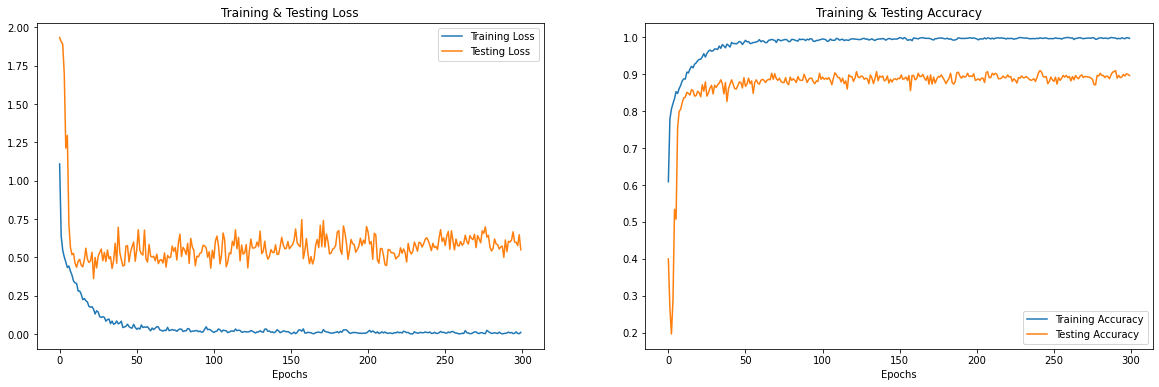

In [ ]:
epochs = [i for i in range(300)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()


6/6 [==============================] - 2s 16ms/step


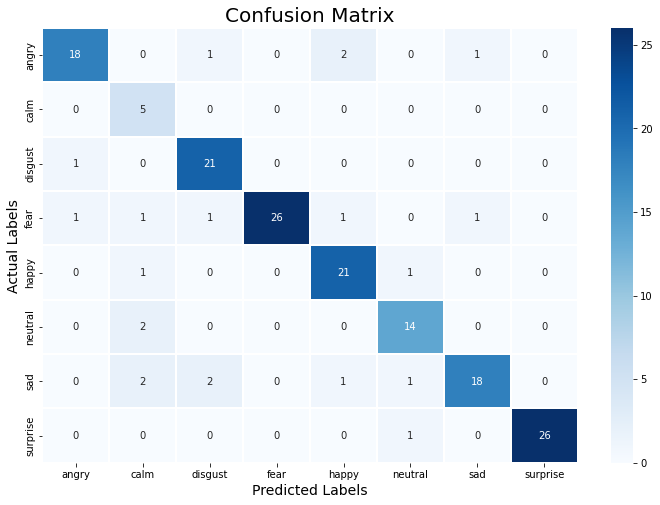

              precision    recall  f1-score   support

       angry       0.90      0.82      0.86        22
        calm       0.45      1.00      0.62         5
     disgust       0.84      0.95      0.89        22
        fear       1.00      0.84      0.91        31
       happy       0.84      0.91      0.87        23
     neutral       0.82      0.88      0.85        16
         sad       0.90      0.75      0.82        24
    surprise       1.00      0.96      0.98        27

    accuracy                           0.88       170
   macro avg       0.84      0.89      0.85       170
weighted avg       0.90      0.88      0.88       170



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))